In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [14]:
# Puerta de Grover
def Grover (qubits):
    g = QuantumCircuit(qubits, qubits)

    g.h(range(qubits))
    g.x(range(qubits))

    g.h(qubits - 1)
    g.mct(list(range(qubits - 1)), qubits - 1, 0)
    g.h(qubits - 1)

    g.x(range(qubits))
    g.h(range(qubits))

    return g

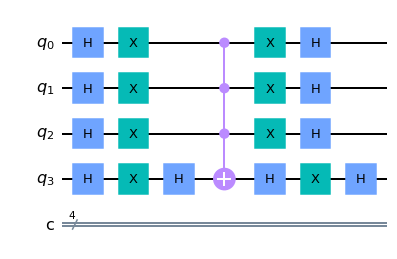

In [16]:
# Caso de una puerta de Grover para 4 Qubits
Grover(4).draw()

In [20]:
def grover_algorithm (detector, qubits, repetitions = 1):
    circ = QuantumCircuit(qubits,qubits)
    circ.h(range(qubits))
    
    for i in range(repetitions):
        circ.barrier(range(qubits))
        circ = circ + detector
        circ.barrier(range(qubits))
        circ = circ + Grover(qubits)
    
    circ.measure(range(qubits), range(qubits))
    return circ

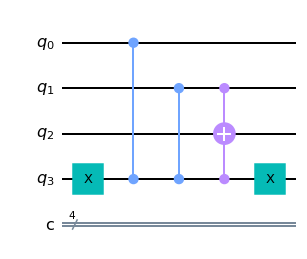

In [30]:
# Este detector pone en fase pi (invierte el signo) de los Qubits
# que formen un número cuyo número de letras sea impar
Detector = QuantumCircuit(4,4)

Detector.x(3)

Detector.cz(3, 0)
Detector.cz(3, 1)

Detector.mct([3,1], 2, 0)

Detector.x(3)

Detector.draw()

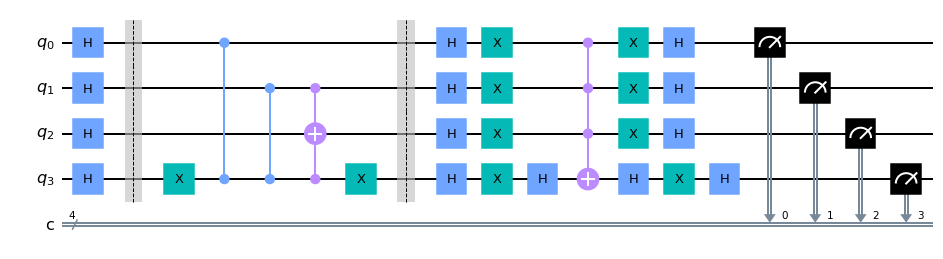

In [31]:
circ = grover_algorithm(Detector, 4)
circ.draw()

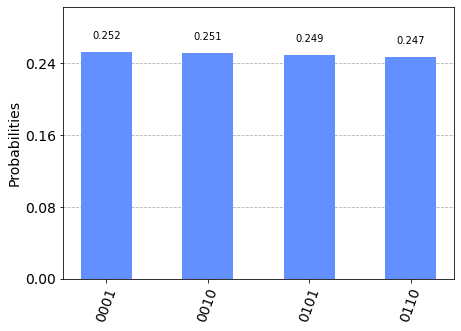

In [32]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 20000)
result = job.result()
count = result.get_counts(circ)
plot_histogram(count)